In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

path_to_data = '/Users/Guille/Desktop/dynamic_update/validation/'

[0.1, 0.1778279410038923, 0.31622776601683794, 0.5623413251903491, 1.0, 1.7782794100389228, 3.1622776601683795, 5.623413251903491, 10.0]
                           score
WIS      forget_rate_f          
WIS_DQ   0.010000       0.022681
         0.021544       0.021967
         0.046416       0.021031
         0.100000       0.020056
         0.215443       0.019663
         0.464159       0.019632
         1.000000       0.019440
WIS_MBD  0.010000       0.023763
         0.021544       0.022944
         0.046416       0.021637
         0.100000       0.020765
         0.215443       0.020637
         0.464159       0.020161
         1.000000       0.020163
WIS_eCDF 0.010000       0.026132
         0.021544       0.025595
         0.046416       0.024167
         0.100000       0.022991
         0.215443       0.023023
         0.464159       0.022783
         1.000000       0.022576


<AxesSubplot:xlabel='WIS', ylabel='score'>

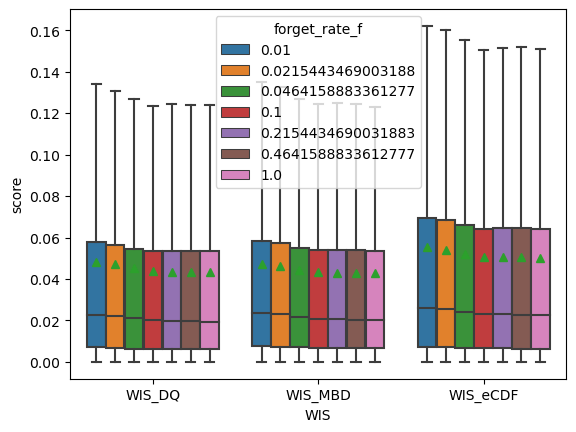

In [81]:
forget_rate_f_ = np.logspace(-1, 1., 9).tolist()
print(forget_rate_f_)

param_name = 'forget_rate_f'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}.csv')

rs_ = pd.melt(rs_, id_vars=[param_name], 
                   value_vars=['WIS_DQ', 'WIS_MBD', 'WIS_eCDF'])

rs_ = rs_.rename(columns = {'variable': 'WIS', 'value': 'score'})

rs_agg_ = rs_.groupby(['WIS', param_name]).agg('median')
print(rs_agg_)

sns.boxplot(data=rs_, x="WIS", y="score", hue=param_name, 
            showfliers=False, showmeans=True)

[0.1, 0.23713737056616552, 0.5623413251903491, 1.333521432163324, 3.1622776601683795, 7.498942093324558, 17.78279410038923, 42.169650342858226, 100.0]
                           score
WIS      forget_rate_e          
WIS_DQ   0.100000       0.021128
         0.237137       0.019977
         0.562341       0.019495
         1.333521       0.019212
         3.162278       0.019065
         7.498942       0.019113
         17.782794      0.019113
         42.169650      0.019113
         100.000000     0.019113
WIS_MBD  0.100000       0.022123
         0.237137       0.020779
         0.562341       0.020045
         1.333521       0.019796
         3.162278       0.019793
         7.498942       0.019713
         17.782794      0.019713
         42.169650      0.019713
         100.000000     0.019713
WIS_eCDF 0.100000       0.024560
         0.237137       0.023211
         0.562341       0.022561
         1.333521       0.022194
         3.162278       0.022107
         7.498942       

<AxesSubplot:xlabel='WIS', ylabel='score'>

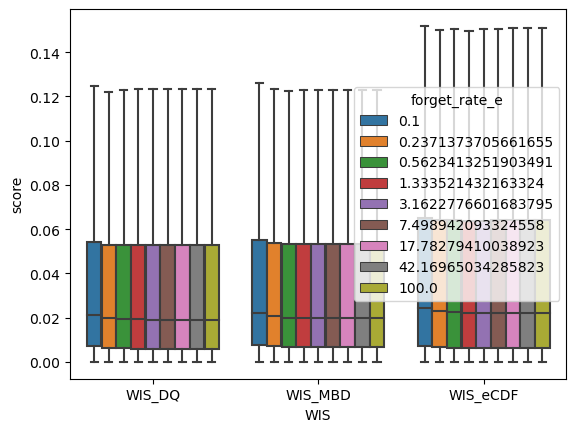

In [101]:
forget_rate_e_ = np.logspace(-1, 2., 9).tolist()
print(forget_rate_e_)

param_name = 'forget_rate_e'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}.csv')

rs_ = pd.melt(rs_, id_vars=[param_name], 
                   value_vars=['WIS_DQ', 'WIS_MBD', 'WIS_eCDF'])

rs_ = rs_.rename(columns = {'variable': 'WIS', 'value': 'score'})

rs_agg_ = rs_.groupby(['WIS', param_name]).agg('median')
print(rs_agg_)

sns.boxplot(data=rs_, x="WIS", y="score", hue=param_name, 
            showfliers=False)

[0.01, 0.02053525026457146, 0.042169650342858224, 0.08659643233600653, 0.1778279410038923, 0.3651741272548377, 0.7498942093324559, 1.539926526059492, 3.1622776601683795]
                            score
WIS      length_scale_f          
WIS_DQ   0.010000        0.019475
         0.020535        0.019459
         0.042170        0.019414
         0.086596        0.019453
         0.177828        0.019578
         0.365174        0.019695
         0.749894        0.020077
         1.539927        0.020775
         3.162278        0.021953
WIS_MBD  0.010000        0.020197
         0.020535        0.019963
         0.042170        0.020172
         0.086596        0.020221
         0.177828        0.020271
         0.365174        0.020368
         0.749894        0.020820
         1.539927        0.021457
         3.162278        0.022627
WIS_eCDF 0.010000        0.022173
         0.020535        0.022065
         0.042170        0.022454
         0.086596        0.022577
         0.177

<AxesSubplot:xlabel='WIS', ylabel='score'>

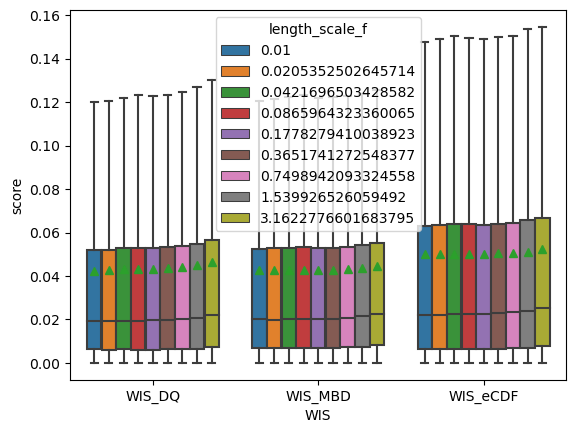

In [85]:
length_scale_f_ = np.logspace(-2, .5, 9).tolist()
print(length_scale_f_)

param_name = 'length_scale_f'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}.csv')

rs_ = pd.melt(rs_, id_vars=[param_name], 
                   value_vars=['WIS_DQ', 'WIS_MBD', 'WIS_eCDF'])

rs_ = rs_.rename(columns = {'variable': 'WIS', 'value': 'score'})

rs_agg_ = rs_.groupby(['WIS', param_name]).agg('median')
print(rs_agg_)

sns.boxplot(data=rs_, x="WIS", y="score", hue=param_name, 
            showfliers=False, showmeans=True)

[1.0, 1.7782794100389228, 3.1622776601683795, 5.623413251903491, 10.0, 17.78279410038923, 31.622776601683793, 56.23413251903491, 100.0]
                            score
WIS      length_scale_e          
WIS_DQ   1.000000        0.041466
         1.778279        0.040501
         3.162278        0.039274
         5.623413        0.037477
         10.000000       0.035509
         17.782794       0.033901
         31.622777       0.032966
         56.234133       0.032947
         100.000000      0.032986
WIS_MBD  1.000000        0.041175
         1.778279        0.040119
         3.162278        0.038881
         5.623413        0.037151
         10.000000       0.035179
         17.782794       0.033575
         31.622777       0.032708
         56.234133       0.032773
         100.000000      0.032843
WIS_eCDF 1.000000        0.049101
         1.778279        0.048163
         3.162278        0.046618
         5.623413        0.044294
         10.000000       0.041595
         17.78

<AxesSubplot:xlabel='WIS', ylabel='score'>

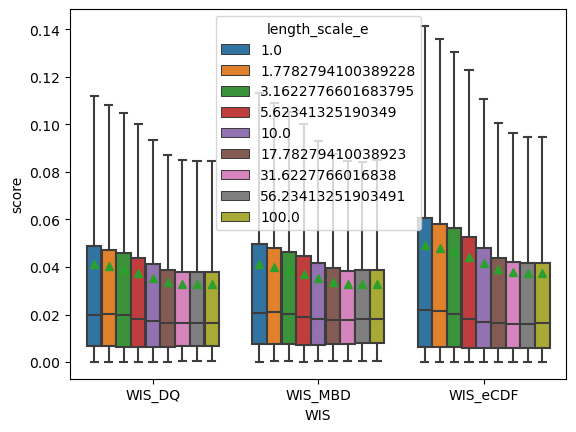

In [99]:
length_scale_e_ = np.logspace(0., 2., 9).tolist()
print(length_scale_e_)

param_name = 'length_scale_e'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}.csv')

rs_ = pd.melt(rs_, id_vars=[param_name], 
                   value_vars=['WIS_DQ', 'WIS_MBD', 'WIS_eCDF'])

rs_ = rs_.rename(columns = {'variable': 'WIS', 'value': 'score'})

rs_agg_ = rs_.groupby(['WIS', param_name]).agg('mean')
print(rs_agg_)

sns.boxplot(data=rs_, x="WIS", y="score", hue=param_name, 
            showfliers=False, showmeans=True)

[0.1, 0.1778279410038923, 0.31622776601683794, 0.5623413251903491, 1.0, 1.7782794100389228, 3.1622776601683795, 5.623413251903491, 10.0]
                         score
WIS      lookup_rate          
WIS_DQ   0.100000     0.023113
         0.177828     0.023785
         0.316228     0.024542
         0.562341     0.024811
         1.000000     0.024910
         1.778279     0.025063
         3.162278     0.024972
         5.623413     0.024944
         10.000000    0.024910
WIS_MBD  0.100000     0.023914
         0.177828     0.024807
         0.316228     0.025561
         0.562341     0.026007
         1.000000     0.025805
         1.778279     0.025945
         3.162278     0.025937
         5.623413     0.025931
         10.000000    0.026021
WIS_eCDF 0.100000     0.026164
         0.177828     0.026937
         0.316228     0.027501
         0.562341     0.028079
         1.000000     0.028215
         1.778279     0.028173
         3.162278     0.028362
         5.623413     0.02

<AxesSubplot:xlabel='WIS', ylabel='score'>

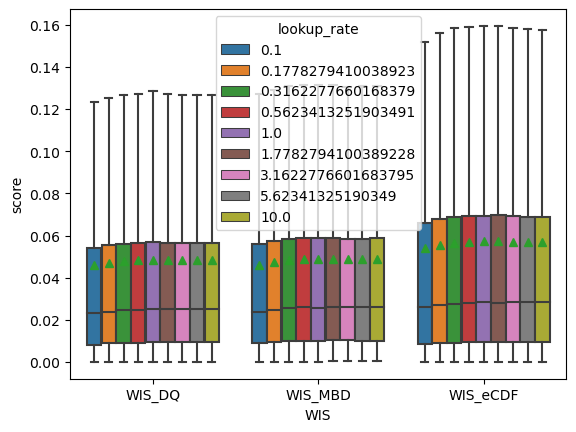

In [87]:
lookup_rate_ = np.logspace(-1, 1, 9).tolist()
print(lookup_rate_)

param_name = 'lookup_rate'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}.csv')

rs_ = pd.melt(rs_, id_vars=[param_name], 
                   value_vars=['WIS_DQ', 'WIS_MBD', 'WIS_eCDF'])

rs_ = rs_.rename(columns = {'variable': 'WIS', 'value': 'score'})

rs_agg_ = rs_.groupby(['WIS', param_name]).agg('median')
print(rs_agg_)

sns.boxplot(data=rs_, x="WIS", y="score", hue=param_name, 
            showfliers=False, showmeans=True)

[0.01, 0.01333521432163324, 0.01778279410038923, 0.023713737056616554, 0.03162277660168379, 0.042169650342858224, 0.05623413251903491, 0.07498942093324558, 0.1]
                        score
WIS      trust_rate          
WIS_DQ   0.010000    0.019440
         0.013335    0.019256
         0.017783    0.019332
         0.023714    0.019454
         0.031623    0.019675
         0.042170    0.019798
         0.056234    0.019962
         0.074989    0.020070
         0.100000    0.020145
WIS_MBD  0.010000    0.020163
         0.013335    0.020098
         0.017783    0.020090
         0.023714    0.020074
         0.031623    0.020320
         0.042170    0.020493
         0.056234    0.020606
         0.074989    0.020739
         0.100000    0.020860
WIS_eCDF 0.010000    0.022576
         0.013335    0.022113
         0.017783    0.021875
         0.023714    0.021856
         0.031623    0.021829
         0.042170    0.021927
         0.056234    0.022034
         0.074989    0.022143

<AxesSubplot:xlabel='WIS', ylabel='score'>

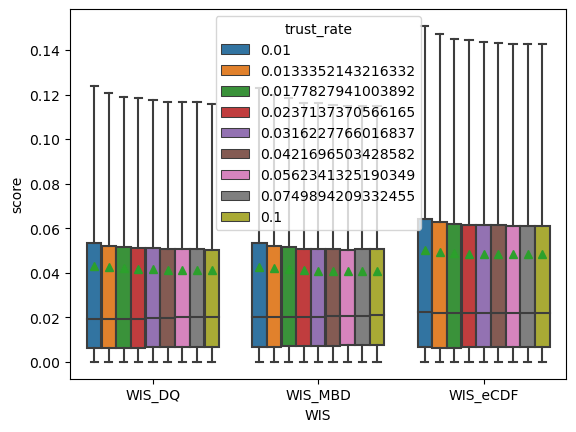

In [88]:
trust_rate_ = np.logspace(-2, -1, 9).tolist()
print(trust_rate_)

param_name = 'trust_rate'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}.csv')

rs_ = pd.melt(rs_, id_vars=[param_name], 
                   value_vars=['WIS_DQ', 'WIS_MBD', 'WIS_eCDF'])

rs_ = rs_.rename(columns = {'variable': 'WIS', 'value': 'score'})

rs_agg_ = rs_.groupby(['WIS', param_name]).agg('median')
print(rs_agg_)

sns.boxplot(data=rs_, x="WIS", y="score", hue=param_name, 
            showfliers=False, showmeans=True)

[0.91, 0.92, 0.93, 0.9400000000000001, 0.95, 0.96, 0.97, 0.98, 0.99]
                  score
WIS      xi            
WIS_DQ   0.91  0.020376
         0.92  0.020131
         0.93  0.020006
         0.94  0.019740
         0.95  0.019570
         0.96  0.019390
         0.97  0.019323
         0.98  0.019328
         0.99  0.019440
WIS_MBD  0.91  0.021398
         0.92  0.021284
         0.93  0.021039
         0.94  0.020910
         0.95  0.020638
         0.96  0.020317
         0.97  0.020137
         0.98  0.019993
         0.99  0.020163
WIS_eCDF 0.91  0.022554
         0.92  0.022590
         0.93  0.022576
         0.94  0.022602
         0.95  0.022553
         0.96  0.022503
         0.97  0.022530
         0.98  0.022387
         0.99  0.022576


<AxesSubplot:xlabel='WIS', ylabel='score'>

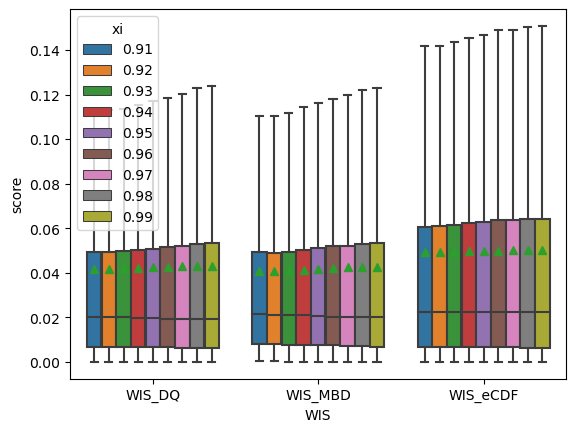

In [89]:
xi_ = np.linspace(0.91, 0.99, 9).tolist()
print(xi_)

param_name = 'xi'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}.csv')

rs_ = pd.melt(rs_, id_vars=[param_name], 
                   value_vars=['WIS_DQ', 'WIS_MBD', 'WIS_eCDF'])

rs_ = rs_.rename(columns = {'variable': 'WIS', 'value': 'score'})

rs_agg_ = rs_.groupby(['WIS', param_name]).agg('median')
print(rs_agg_)

sns.boxplot(data=rs_, x="WIS", y="score", hue=param_name, 
            showfliers=False, showmeans=True)

[100, 125, 150, 175, 200, 225, 250]
                   score
WIS      gamma          
WIS_DQ   100    0.019440
         118    0.019440
         137    0.019422
         156    0.019473
         175    0.019422
         193    0.019440
         212    0.019422
         231    0.019517
         250    0.019484
WIS_MBD  100    0.020172
         118    0.020163
         137    0.020136
         156    0.020105
         175    0.020156
         193    0.020105
         212    0.020156
         231    0.020211
         250    0.020210
WIS_eCDF 100    0.022576
         118    0.022572
         137    0.022572
         156    0.022572
         175    0.022572
         193    0.022572
         212    0.022576
         231    0.022576
         250    0.022572


<AxesSubplot:xlabel='WIS', ylabel='score'>

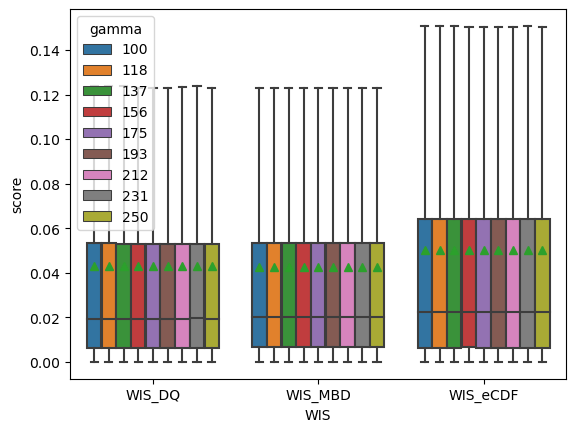

In [91]:
gamma_ = np.linspace(100, 250, 7, dtype = int).tolist()
print(gamma_)

param_name = 'gamma'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}.csv')

rs_ = pd.melt(rs_, id_vars=[param_name], 
                   value_vars=['WIS_DQ', 'WIS_MBD', 'WIS_eCDF'])

rs_ = rs_.rename(columns = {'variable': 'WIS', 'value': 'score'})

rs_agg_ = rs_.groupby(['WIS', param_name]).agg('median')
print(rs_agg_)

sns.boxplot(data=rs_, x="WIS", y="score", hue=param_name, 
            showfliers=False, showmeans=True)

[0.1, 0.1333521432163324, 0.1778279410038923, 0.23713737056616552, 0.31622776601683794, 0.4216965034285822, 0.5623413251903491, 0.7498942093324559, 1.0]
                      score
WIS      zeta              
WIS_DQ   0.100000  0.020305
         0.133352  0.020210
         0.177828  0.020112
         0.237137  0.019934
         0.316228  0.019665
         0.421697  0.019569
         0.562341  0.019474
         0.749894  0.019416
         1.000000  0.019440
WIS_MBD  0.100000  0.020659
         0.133352  0.020592
         0.177828  0.020546
         0.237137  0.020484
         0.316228  0.020370
         0.421697  0.020273
         0.562341  0.020319
         0.749894  0.020180
         1.000000  0.020163
WIS_eCDF 0.100000  0.019936
         0.133352  0.020018
         0.177828  0.019947
         0.237137  0.019942
         0.316228  0.020030
         0.421697  0.020312
         0.562341  0.020595
         0.749894  0.021291
         1.000000  0.022576


<AxesSubplot:xlabel='WIS', ylabel='score'>

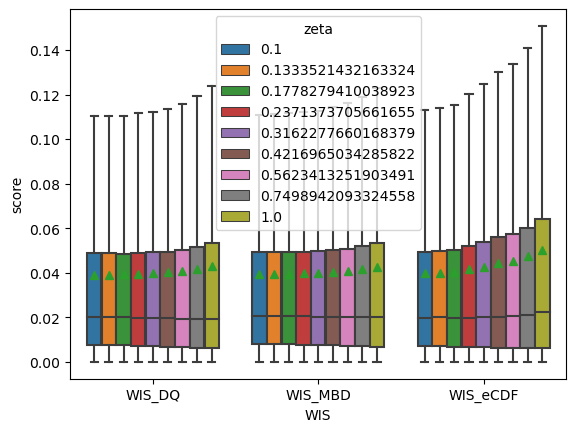

In [92]:
zeta_ = np.logspace(-1, 0., 9).tolist()
print(zeta_)

param_name = 'zeta'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}.csv')

rs_ = pd.melt(rs_, id_vars=[param_name], 
                   value_vars=['WIS_DQ', 'WIS_MBD', 'WIS_eCDF'])

rs_ = rs_.rename(columns = {'variable': 'WIS', 'value': 'score'})

rs_agg_ = rs_.groupby(['WIS', param_name]).agg('median')
print(rs_agg_)

sns.boxplot(data=rs_, x="WIS", y="score", hue=param_name, 
            showfliers=False, showmeans=True)

[150, 174, 198, 223, 247, 271, 296, 320, 345]
                       score
WIS      kappa_min          
WIS_DQ   150        0.019328
         178        0.019269
         206        0.019247
         234        0.019415
         262        0.019479
         290        0.019589
         318        0.019615
         346        0.019616
         374        0.019476
WIS_MBD  150        0.020130
         178        0.020160
         206        0.020361
         234        0.020386
         262        0.020531
         290        0.020557
         318        0.020599
         346        0.020651
         374        0.020728
WIS_eCDF 150        0.022212
         178        0.022030
         206        0.022157
         234        0.022138
         262        0.022167
         290        0.022241
         318        0.022204
         346        0.022323
         374        0.022324


<AxesSubplot:xlabel='WIS', ylabel='score'>

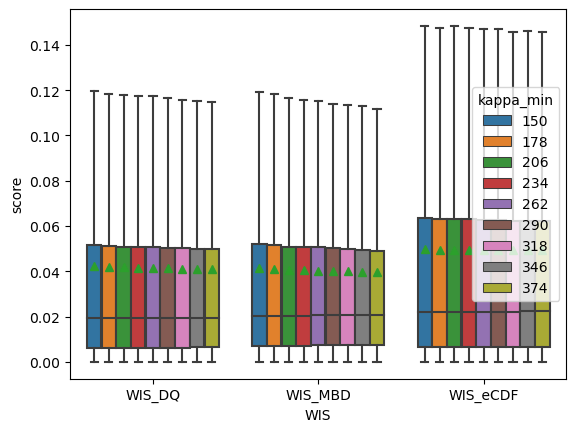

In [94]:
kappa_min_ = np.linspace(150, 345, 9, dtype = int).tolist()
print(kappa_min_)

param_name = 'kappa_min'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}.csv')

rs_ = pd.melt(rs_, id_vars=[param_name], 
                   value_vars=['WIS_DQ', 'WIS_MBD', 'WIS_eCDF'])

rs_ = rs_.rename(columns = {'variable': 'WIS', 'value': 'score'})

rs_agg_ = rs_.groupby(['WIS', param_name]).agg('median')
print(rs_agg_)

sns.boxplot(data=rs_, x="WIS", y="score", hue=param_name, 
            showfliers=False, showmeans=True)

[350, 431, 512, 593, 675, 756, 837, 918, 1000]
                       score
WIS      kappa_max          
WIS_DQ   250        0.019518
         343        0.019484
         437        0.019440
         531        0.019440
         625        0.019473
         718        0.019473
         812        0.019473
WIS_MBD  250        0.020211
         343        0.020156
         437        0.020137
         531        0.020136
         625        0.020105
         718        0.020125
         812        0.020105
WIS_eCDF 250        0.022602
         343        0.022576
         437        0.022576
         531        0.022602
         625        0.022602
         718        0.022602
         812        0.022602


<AxesSubplot:xlabel='WIS', ylabel='score'>

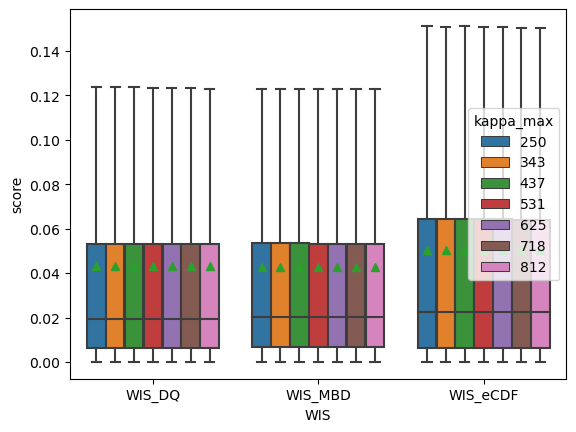

In [95]:
kappa_max_ = np.linspace(350, 1000, 9, dtype = int).tolist()
print(kappa_max_)

param_name = 'kappa_max'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-WIS-{param_name}.csv')

rs_ = pd.melt(rs_, id_vars=[param_name], 
                   value_vars=['WIS_DQ', 'WIS_MBD', 'WIS_eCDF'])

rs_ = rs_.rename(columns = {'variable': 'WIS', 'value': 'score'})

rs_agg_ = rs_.groupby(['WIS', param_name]).agg('median')
print(rs_agg_)

sns.boxplot(data=rs_, x="WIS", y="score", hue=param_name, 
            showfliers=False, showmeans=True)

                              score
CS         length_scale_e          
CS_eCDF_60 1.000000        0.277778
           1.778279        0.300926
           3.162278        0.333333
           5.623413        0.361111
           10.000000       0.398148
           17.782794       0.423611
           31.622777       0.439815
           56.234133       0.444444
           100.000000      0.444444
CS_eCDF_80 1.000000        0.444444
           1.778279        0.481481
           3.162278        0.518519
           5.623413        0.562500
           10.000000       0.611111
           17.782794       0.638889
           31.622777       0.666667
           56.234133       0.671296
           100.000000      0.673611
CS_eCDF_90 1.000000        0.578704
           1.778279        0.615741
           3.162278        0.652778
           5.623413        0.699074
           10.000000       0.750000
           17.782794       0.787037
           31.622777       0.810185
           56.234133       0

<AxesSubplot:xlabel='CS', ylabel='score'>

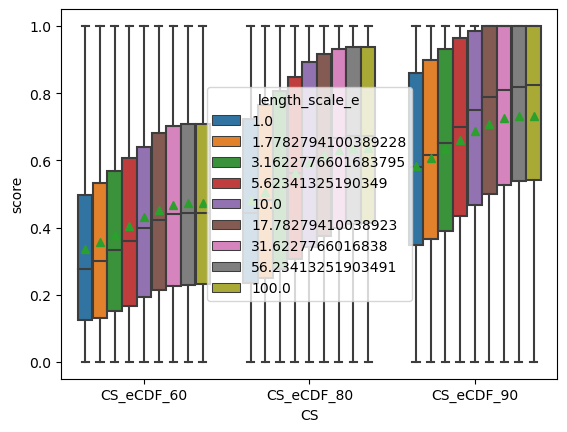

In [102]:
param_name = 'length_scale_e'

rs_ = pd.read_csv(path_to_data + f'ffc_validation-CS-{param_name}.csv')

rs_ = pd.melt(rs_, id_vars=[param_name], 
                   value_vars=['CS_eCDF_60', 'CS_eCDF_80', 'CS_eCDF_90'])

rs_ = rs_.rename(columns = {'variable': 'CS', 'value': 'score'})

rs_agg_ = rs_.groupby(['CS', param_name]).agg('median')
print(rs_agg_)

sns.boxplot(data=rs_, x="CS", y="score", hue=param_name, 
            showfliers=False, showmeans=True)